TP1: Plongements de mots (word embeddings)

# 1. Télécharger des embeddings pré-entraînés

---



In [ ]:
!pip install polyglot

     |████████████████████████████████| 133kB 4.9MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52557 sha256=c0ab50925e713dc41829b97ae75e7cfb93af3be915a14eec3f22e8fe9875aaaf
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys

sys.path.insert(0, '/content/drive/My Drive/TA/embedding_modules')

In [ ]:
# basic imports
import os

#import multiprocessing
from multiprocessing import Pool
N_JOBS = 4

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# scientific python
import numpy as np
import scipy

# graphics
import matplotlib
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns
# data handling
import pandas as pd
# embedding functions
from polyglot.mapping import Embedding, OrderedVocabulary

# Initialize random number generator for reproducibility
np.random.seed(1337)  

# custom functions
import embeddings_
import similarity_

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)

 1. Télécharger des embeddings pré-entraînés

In [ ]:
# Define which embedding to download

embeddings_download_jobs = []

## Collobert & Weston
embeddings_download_jobs.append(("Collobert & Weston", ["fetch_collobert_and_weston", {}]))

## GloVe
embeddings_download_jobs.append(("GloVe", ["fetch_GloVe", {"dim": 300, "corpus": "wiki-6B"}]))

## Word2Vec Google News
#embeddings_download_jobs.append(("GoogleNews", ["fetch_SG_GoogleNews", {}]))

## FastText
#embeddings_download_jobs.append(("FastText", ["fetch_FastText", {}]))

In [ ]:
for embeddings_name, (method, kwargs) in embeddings_download_jobs:
    # call the function method from the module embeddings 
    word_embeddings = getattr(embeddings_, method)(**kwargs)    
    print(embeddings_name, 'embeddings downloaded & loaded')


Dataset created in /root/web_data/embeddings



100%|██████████| 60.5M/60.5M [00:07<00:00, 7.69Mb/s]


...done. (8 seconds, 0 min)
Collobert & Weston embeddings downloaded & loaded


100%|██████████| 862M/862M [06:27<00:00, 2.23Mb/s]


...done. (387 seconds, 6 min)
Extracting data from /root/web_data/embeddings/glove.6B/glove.6B.zip...
   ...done.
GloVe embeddings downloaded & loaded


In [ ]:
colobert_embedding = embeddings_.fetch_collobert_and_weston()
glove_embedding = embeddings_.fetch_GloVe()


File already downloaded, skipping


# 2. Exploration des embeddings

---



Liste des mots les plus proches

L'objectif de cet exercice est de lister les mots les plus proches d'un mot donné pour les différentes embeddings. Après  avoir été téléchargés, les différents embeddings sont des instances de la classe Embeddings de polyglot. Cette classe possède une méthode nearest_neighbors qui retourne les n mots les plus proches d'un mot passé en paramètre. 

---




In [ ]:
l_mots = ['mother','computer','dentist','war','president','secretary','nurse']
words_plus_neighbors = []
embeddings_plus_neighbors = []
for mot in l_mots:
  neighbors = colobert_embedding.nearest_neighbors(word=mot,top_k=5)
  print("5 mots les plus proches de ", mot)
  print(neighbors)
  l_mot = []
  l_embedding = []
  l_mot.append(neighbors)
  for neighbor in neighbors:
    l_embedding.append(colobert_embedding[neighbor])
  words_plus_neighbors.append(l_mot)
  embeddings_plus_neighbors.append(l_embedding)


5 mots les plus proches de  mother
['daughter', 'wife', 'father', 'husband', 'sister']
5 mots les plus proches de  computer
['laptop', 'multimedia', 'desktop', 'software', 'wiki']
5 mots les plus proches de  dentist
['physician', 'midwife', 'pharmacist', 'veterinarian', 'pediatrician']
5 mots les plus proches de  war
['revolution', 'death', 'independence', 'court', 'fighting']
5 mots les plus proches de  president
['governor', 'chairman', 'mayor', 'secretary', 'senator']
5 mots les plus proches de  secretary
['minister', 'chairman', 'treasurer', 'commissioner', 'undersecretary']
5 mots les plus proches de  nurse
['physician', 'surgeon', 'veterinarian', 'dentist', 'midwife']


Visualisation avec T-SNE
Les embeddings sont des vecteurs de plusieurs centaines de dimensions. Il n'est donc pas possible de les visualiser dans leur espace d'origine. Il est par contre possible d'appliquer des algorithmes de réduction de dimension pour les visualiser en 2 ou 3 dimension. Un des algorithmes de réduction de dimension permettant une visualisation en 2D est tSNE. 

---



File already downloaded, skipping


06:59:19 DEBUG:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
06:59:19 DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
06:59:19 DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
06:59:19 DEBUG:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
06:59:19 DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 3.335
06:59:19 DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
06:59:19 DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
06:59:19 DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 2.05
06:59:19 DEBUG:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.

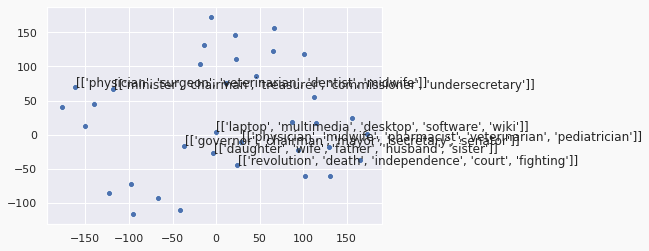

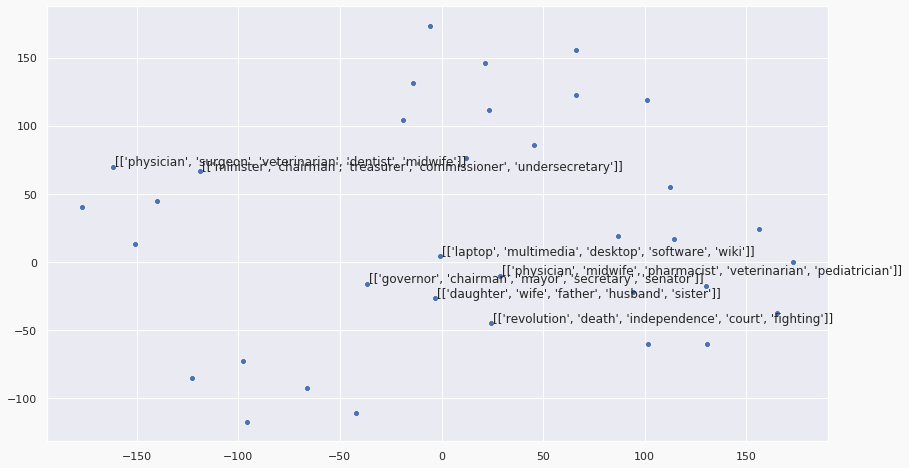

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

for embeddings_name, (method, kwargs) in embeddings_download_jobs:
    # get the embedding
    word_embeddings = getattr(embeddings_, method)(**kwargs)
    
    #retrieve the word representation
    word_vectors = np.array(embeddings_plus_neighbors)
    n, m, k = word_vectors.shape
    word_vectors = word_vectors.reshape(n * m, k)
    # create the tSNE transform
    tsne = TSNE(perplexity=15.0,n_iter=2000,random_state=0) #n_component par defaut 2=nb de dim
    
    # fit and transform the word vectors
    T = tsne.fit_transform(word_vectors)

    # plot
    fig = plt.figure()
    fig.patch.set_facecolor('#f9f9f9')

    sns.set(rc={'figure.figsize':(14, 8)})
    sns.set(font_scale=1)

    sns.scatterplot(x=T[:,0], y=T[:,1])
    
    for label, x, y in zip(words_plus_neighbors, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# 3. Evaluation des embeddings

---
Téléchargement des datasets pré-établis et annotés manuellement
Nous allons utiliser 4 jeux de données  pour évaluer la qualité des embeddings : MEN, WS353R, SimLex999 et MTurk. Ces jeux de données contiennent des paires de mots dont la proximité sémantique a été évaluée manuellement par des humains. Pour chaque dataset, dataset.X contient une liste de paires de mots et dataset.y contient le score de proximité pour chaque paire.
MEN, 3 000 paires évaluées par relation sémantique avec une échelle discrète de 0 à 50
SimLex-999, 999 paires évaluées avec un fort respect pour la similarité sémantique avec une échelle de 0 à 10
MTurk-287, 287 paires évaluées par relation sémantique avec une échelle de 0 à 5
WordSim-353, 353 paires évaluées par similarité sémantique (cependant, certains chercheurs trouvent les instructions pour les évaluateurs ambiguës en ce qui concerne la similarité et l'association) sur une échelle de 0 à 10

---




In [ ]:
similarity_tasks = {
    "MEN": similarity_.fetch_MEN(),
    "WS353R": similarity_.fetch_WS353(which="relatedness"),
    "SimLex999": similarity_.fetch_SimLex999(),
    "MTurk": similarity_.fetch_MTurk(),
}

for name, dataset in similarity_tasks.items():
    print('\n', name, ':',len(dataset.X),'items')
    for data, score in zip(dataset.X[:4], dataset.y[:4]):
        print(' '*4, ', '.join(data), ':', score)


Dataset created in /root/web_data/similarity


 MEN : 3000 items
     sun, sunlight : [10.]
     automobile, car : [10.]
     river, water : [9.8]
     stair, staircase : [9.8]

 WS353R : 252 items
     computer, keyboard : 7.62
     Jerusalem, Israel : 8.46
     planet, galaxy : 8.11
     canyon, landscape : 7.53

 SimLex999 : 999 items
     old, new : 1.58
     smart, intelligent : 9.2
     hard, difficult : 8.77
     happy, cheerful : 9.55

 MTurk : 287 items
     episcopal, russia : 5.5
     water, shortage : 5.428571428
     horse, wedding : 4.533333334
     plays, losses : 6.4


 Résultats évaluation intrinsèque
Notre objectif est de comparer les similarités entre les paires de mots des datasets calculées à partir des embeddings et celles données par les annotateurs humains. Si un embedding prédit les similarités de la même manière que les humains, on estime qu'il est bon. On peut donc calculer la corrélation entre la proximité donné par l'embedding et celle donnée par les humains pour chaque paire de mots du dataset.

---



 Visualisation des résultats de similarité
 
Le code suivant permet de visualiser les coefficients de corrélation pour chaque dataset sur les différents jeux de test.

---



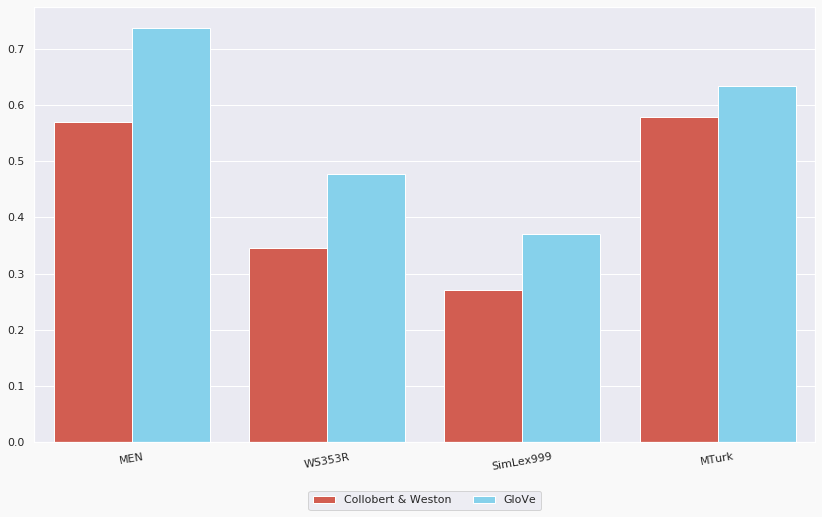

In [ ]:
import pandas as pd


df = pd.DataFrame.from_dict(similarity_results, orient='columns')
df

fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')



sns.set(rc={'figure.figsize':(8, 6)})
sns.set(font_scale=1)

colors = ["#e74c3c", "#75d9fc", "#b4e0ef", "#34495e", "#e74c3c", "#2ecc71"]
ax = sns.barplot(x="Dataset", y="Score", hue="Embeddings", data=df, errwidth=0, palette=sns.color_palette(colors))
#ax = sns.barplot(x="Dataset", y="value", hue="Dataset", data=df, errwidth=0, palette=sns.color_palette(colors))  #, palette=palette GnBu_d


ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3, fancybox=True, shadow=False)
ax.set_xticklabels(df['Dataset'], rotation=10)
ax.set(xlabel="", ylabel="")

plt.show()

 Évaluation d'analogies
Notre objectif est maintenant d'explorer les relations sémantiques induites par l'arithmétique sur les embeddings. Nous allons donc explorer les analogies induites par les embeddings sous forme de raisonnement du type : "l'homme est au roi ce que la femme est à ?", la réponse étant "la reine". On peut calculer la réponse avec les représentations fournies par l'embedding par :  v = vecteur(roi)-vecteur(homme)+vecteur(femme). La réponse étant alors le mot dont la représentation est la plus proche du vecteur v. Pour trouver le mot dont le vecteur est le plus proche de v, il faut définir une distance dans l'espace des embeddings. Nous utiliserons la similarité cosinus

---



In [ ]:
def my_cosine_similarity(a,b):
    return np.dot(a,b) / (np.linalg.norm(a) * np.linalg.norm(b))

def sorted_by_similarity(word_embeddings, base_vector):
    """Returns words sorted by cosine distance to a given vector, most similar first"""
    words_with_distance = [(my_cosine_similarity(base_vector, word_embeddings[w]), w) 
                           for w in word_embeddings.vocabulary]

    return sorted(words_with_distance, key=lambda t: t[0], reverse=True)

def is_redundant(word):
    return (
        word_1.lower() in word.lower() or
        word_2.lower() in word.lower() or
        word_3.lower() in word.lower())


pairs = [(['man', 'woman'], 'king'), 
         (['man', 'programmer'], 'woman'), 
         (['father', 'doctor'], 'mother'),
         (['father', 'facebook'], 'mother')
        ]

words_and_responses = []
for embeddings_name, (method, kwargs) in embeddings_download_jobs:
    # get the embedding
    word_embeddings = getattr(embeddings_, method)(**kwargs)
    
    for pair in pairs:
        word_1, word_2, word_3 = pair[0][0], pair[0][1], pair[1]
        
        closest = sorted_by_similarity(word_embeddings, 
                                       word_embeddings[word_2] - word_embeddings[word_1] + 
                                       word_embeddings[word_3])[:10]

        closest = [(dist, w) for (dist, w) in closest if not is_redundant(w)] #
        
        print("{} + {} - {} = ? => {}".format(word_2, word_3, word_1, closest[0][1]))
        words_and_responses += [word_1, word_2, word_3,closest[0][1]]

woman + king - man = ? => princess
programmer + woman - man = ? => blogger
doctor + mother - father = ? => nurse
facebook + mother - father = ? => yahoo
File already downloaded, skipping
woman + king - man = ? => queen
programmer + woman - man = ? => freelance
doctor + mother - father = ? => nurse
facebook + mother - father = ? => twitter


Cela présente des stéréotypes de genre féminin / masculin: 

e.g. woman = blogger quand man = programmer

Visualisation des analogies


Les relations d'analogies peuvent se visualiser dans l'espace des embeddings après réduction de dimension, par exemple avec tSNE.

---



File already downloaded, skipping


07:09:16 DEBUG:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.3.
07:09:16 DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
07:09:16 DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
07:09:16 DEBUG:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
07:09:16 DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 3.335
07:09:16 DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
07:09:16 DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
07:09:16 DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 2.05
07:09:16 DEBUG:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.

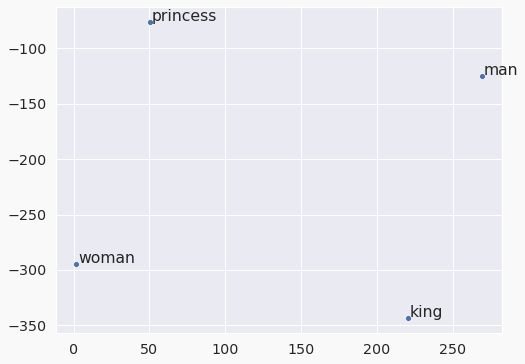

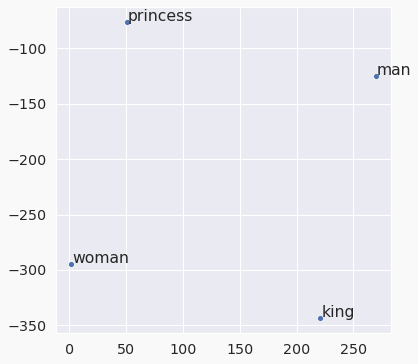

In [ ]:
for embeddings_name, (method, kwargs) in embeddings_download_jobs:
    # get the embedding
    word_embeddings = getattr(embeddings_, method)(**kwargs)
    
    word_vectors = np.array([word_embeddings[word] for word in words_and_responses[:4]])

    
    tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=5.0)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(word_vectors)
    
    fig = plt.figure()
    fig.patch.set_facecolor('#f9f9f9')

    sns.set(rc={'figure.figsize':(6, 6)})
    sns.set(font_scale=1.3)

    sns.scatterplot(x=T[:, 0], y=T[:, 1])
    
    for label, x, y in zip(words_and_responses, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')